#PROBLEM DESCRIPTION: Using machine learning algorithms, placement prediction determines the likelihood that a student will be hired by a firm based on a variety of criteria, including their academic performance

#Importing Libraries

In [15]:
!pip install --upgrade scikit-learn

In [16]:
import numpy as np #for numerical operations and array handling
import pandas as pd #for data manipulation and analysis with DataFrame and Series structures
import os #for interacting with the operating system

In [17]:
# Data Visualization Libraries
import seaborn as sns  # Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import plotly.express as px  # Plotly Express for interactive visualizations
import plotly.graph_objects as go  # Plotly Graph Objects for more customization
from plotly.subplots import make_subplots  # Plotly Subplots for creating subplots

# Data Preprocessing and Modeling Libraries
from sklearn import preprocessing  # Scikit-learn preprocessing for data scaling
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # Scikit-learn Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Scikit-learn Random Forest model
from xgboost import XGBClassifier  # XGBoost Classifier for gradient boosting
from sklearn.metrics import accuracy_score  # Scikit-learn metric for model evaluation

# Additional Visualization Library (Duplicate Import)
import plotly.express as px  # Plotly Express for more interactive visualizations


In [18]:
!pip install kaggle

In [23]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [24]:
!kaggle datasets download -d tejashvi14/engineering-placements-prediction

  0% 0.00/10.0k [00:00<?, ?B/s]
100% 10.0k/10.0k [00:00<00:00, 16.3MB/s]


In [25]:
!unzip \*.zip && rm*.zip

Archive:  engineering-placements-prediction.zip
  inflating: collegePlace.csv        
/bin/bash: line 1: rm*.zip: command not found


In [26]:
data = pd.read_csv("collegePlace.csv")
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Meta Information of the Data frame

In [27]:
print(f"Shape of Dataframe is: {data.shape}") #Dataframe is: (x, y), where 'x' is the number of rows, and 'y' is the number of columns

Shape of Dataframe is: (2966, 8)


In [28]:
print('Datatype in Each Column\n')
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis("Column Name") #Create a new DataFrame with column names and their corresponding data types

Datatype in Each Column



,Datatype
Column Name,
Age,int64
Gender,object
Stream,object
Internships,int64
CGPA,int64
Hostel,int64
HistoryOfBacklogs,int64
PlacedOrNot,int64


In [29]:
# Generate descriptive statistics for the DataFrame and transpose for better readability
summary_stats = data.describe().T

# Display the transposed summary statistics
summary_stats


,count,mean,std,min,25%,50%,75%,max
Age,2966.0,21.485840,1.324933,19.0,21.0,21.0,22.0,30.0
Internships,2966.0,0.703641,0.740197,0.0,0.0,1.0,1.0,3.0
CGPA,2966.0,7.073837,0.967748,5.0,6.0,7.0,8.0,9.0
Hostel,2966.0,0.269049,0.443540,0.0,0.0,0.0,1.0,1.0
HistoryOfBacklogs,2966.0,0.192178,0.394079,0.0,0.0,0.0,0.0,1.0
PlacedOrNot,2966.0,0.552596,0.497310,0.0,0.0,1.0,1.0,1.0


#Checking for NaN values

In [30]:
pd.DataFrame(data.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name") # Check for null values in each column and count them

,Null Values
Column Name,
Age,0
Gender,0
Stream,0
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,0
PlacedOrNot,0


#EDA and visualization

In [31]:
fig = px.histogram(data, 'Age',
                   title="<b>Average Age of Student</b>") #the distribution of ages in the dataset with a histogram, and the added red dashed line indicates the mean age

fig.add_vline(x=data['Age'].mean(), line_width=2, line_dash="dash", line_color="red")

fig.show()

In [32]:
# Create a histogram with color differentiation
fig = px.histogram(data, 'Age', color="Gender", title="<b>Average Age Gender wise>")

# Update trace attributes to set marker opacity
fig.update_traces(marker={"opacity": 0.7})

# Add a vertical line at the overall mean age with specific attributes
fig.add_vline(x=data['Age'].mean(), line_width=2, line_dash="dash", line_color="black")

# Display the plot
fig.show()


In [33]:
# Create a DataFrame showing the counts of each unique value in the 'Gender' column
pd.DataFrame(data['Gender'].value_counts()).rename({"Gender":"Counts"}, axis = 1).rename_axis("Gender")

,Counts
Gender,
Male,2475
Female,491


In [34]:
px.histogram(data, x = "Gender", title = "<b>Total Male and Female</b>", color = "Gender")

In [35]:
# Separate data into male and female
male = data[data['Gender'] == "Male"]
female = data[data['Gender'] == "Female"]

# Calculate total counts for male and female
total_male = male.shape[0]
total_female = female.shape[0]

# Calculate total counts for male and female who passed
total_male_pass = male[male['PlacedOrNot'] == 1].shape[0]
total_female_pass = female[female['PlacedOrNot'] == 1].shape[0]

# Calculate percentage of males and females who passed
pass_male_percentage = np.round((total_male_pass * 100) / total_male, 2)
pass_female_percentage = np.round((total_female_pass * 100) / total_female, 2)

# Create a dictionary with the analysis details
details = {
    "Total Male": [total_male],
    "Total Female": [total_female],
    "Total Male Pass": [total_male_pass],
    "Total Female Pass": [total_female_pass],
    "% of Passed Male": [pass_male_percentage],
    "% of Passed Female": [pass_female_percentage]
}


In [36]:
details

{'Total Male': [2475],
 'Total Female': [491],
 'Total Male Pass': [1364],
 'Total Female Pass': [275],
 '% of Passed Male': [55.11],
 '% of Passed Female': [56.01]}

#Identifying and Handling Outliers

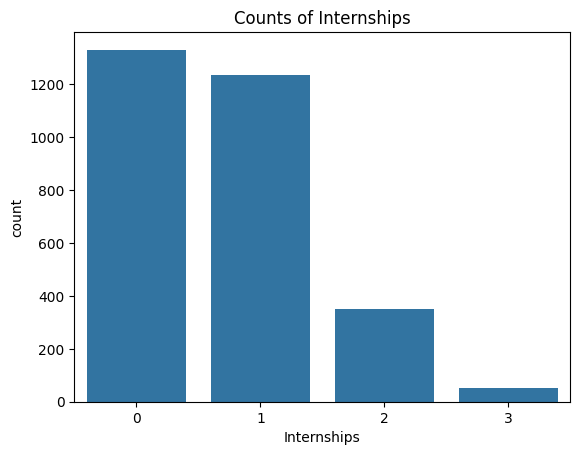

In [37]:
#'Internships'
sns.countplot(x='Internships', data=data)
plt.title("Counts of Internships")
plt.show()


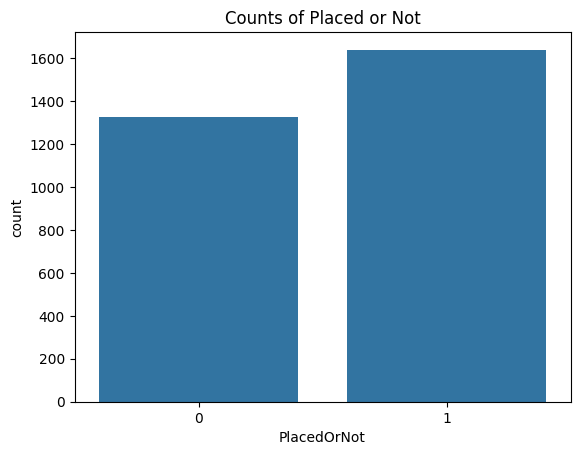

In [38]:
#'PlacedOrNot'
sns.countplot(x='PlacedOrNot', data=data)
plt.title("Counts of Placed or Not")
plt.show()


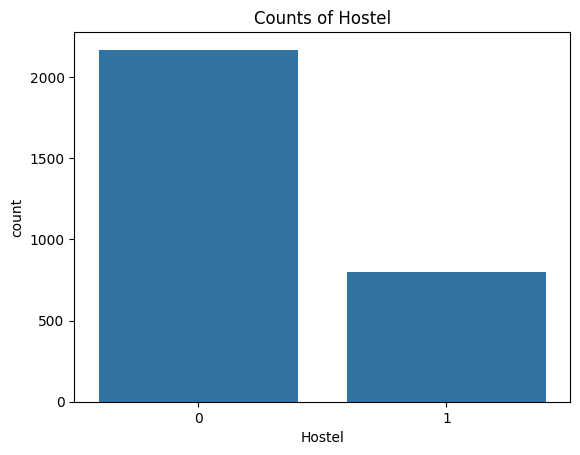

In [39]:
#'Hostel'
sns.countplot(x='Hostel', data=data)
plt.title("Counts of Hostel")
plt.show()


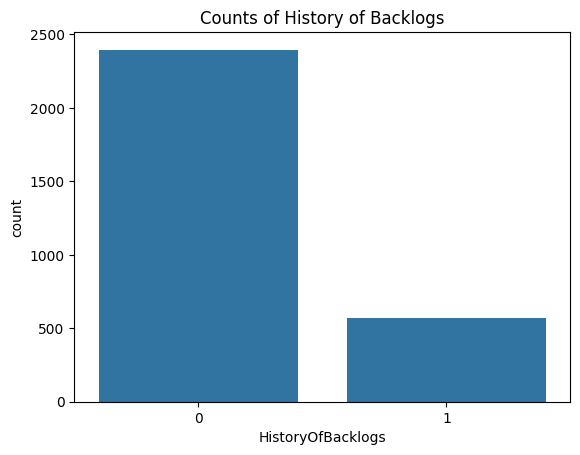

In [40]:
#'HistoryOfBacklogs'
sns.countplot(x='HistoryOfBacklogs', data=data)
plt.title("Counts of History of Backlogs")
plt.show()


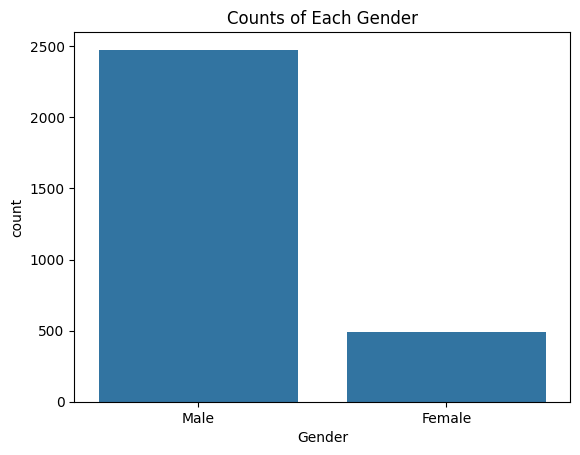

In [41]:
#'Gender'
sns.countplot(x='Gender', data=data)
plt.title("Counts of Each Gender")
plt.show()


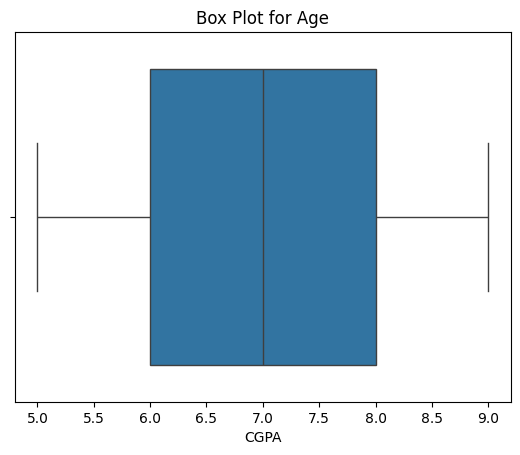

In [42]:
#'Age'
sns.boxplot(x='CGPA', data=data)
plt.title("Box Plot for Age")
plt.show()

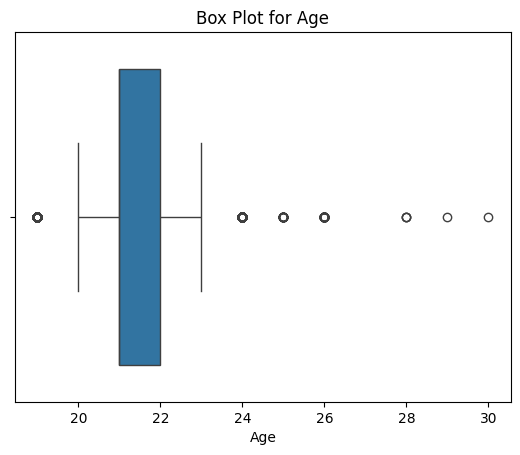

In [43]:
# Replace 'Age' with the actual numeric column name in your dataset
sns.boxplot(x='Age', data=data)
plt.title("Box Plot for Age")
plt.show()


In [44]:
from scipy.stats import zscore

# Set a threshold for considering values as potential outliers
threshold = 30

# Calculate z-scores for the 'Age' column
z_scores_age = zscore(data['Age'])

# Identify potential outliers based on z-scores and the threshold
outliers_age = (z_scores_age > threshold) | (z_scores_age < -threshold)

# Display rows with potential outliers
potential_outliers = data[outliers_age]
print("Rows with potential outliers in 'Age':")
print(potential_outliers)

# Filter the dataset to include only valid values (up to age 30)
valid_data = data[data['Age'] <= threshold]

# Omitted box plot to focus on z-score analysis

# Optionally, you can print descriptive statistics for 'Age' in valid_data
print("Descriptive statistics of 'Age' in valid_data:")
print(valid_data['Age'].describe())



Rows with potential outliers in 'Age':
Empty DataFrame
Columns: [Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs, PlacedOrNot]
Index: []
Descriptive statistics of 'Age' in valid_data:
count    2966.000000
mean       21.485840
std         1.324933
min        19.000000
25%        21.000000
50%        21.000000
75%        22.000000
max        30.000000
Name: Age, dtype: float64


MODEL 1 : DecisionTree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you have X, y, x_train, x_test, y_train, and y_test

# Create a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=100)

# Train the model on the training set
dt_clf.fit(x_train, y_train)

# Make predictions on the training set
train_pred = dt_clf.predict(x_train)

# Evaluate accuracy on the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Make predictions on the test set
test_pred = dt_clf.predict(x_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9282273603082851
Test Accuracy: 0.8719101123595505


Model 2: KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you have X, y, x_train, x_test, y_train, and y_test

# Create a KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors

# Train the model on the training set
knn_clf.fit(x_train, y_train)

# Make predictions on the training set
train_pred = knn_clf.predict(x_train)

# Evaluate accuracy on the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Make predictions on the test set
test_pred = knn_clf.predict(x_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8988439306358381
Test Accuracy: 0.8696629213483146


Model 3 : RBF SVM

In [54]:
#RBF (Radial Basis Function) Kernel:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you have X, y, x_train, x_test, y_train, and y_test

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create an SVM classifier with RBF kernel
svm_clf = SVC(kernel='rbf', random_state=100, C=1.0, gamma='scale')  # You can tune C and gamma

# Train the SVM model on the scaled training data
svm_clf.fit(x_train_scaled, y_train)

# Make predictions on the scaled training set
train_pred = svm_clf.predict(x_train_scaled)

# Evaluate accuracy on the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Make predictions on the scaled test set
test_pred = svm_clf.predict(x_test_scaled)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8660886319845857
Test Accuracy: 0.8808988764044944


Model 4 : XGBoost

In [55]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already defined X, y, x_train, x_test, y_train, and y_test

# Convert data to DMatrix format
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost model
num_rounds = 100
xgb_clf = xgb.train(params, dtrain, num_rounds)

# Make predictions on the training set
train_pred = xgb_clf.predict(dtrain)
train_pred_binary = [1 if p >= 0.5 else 0 for p in train_pred]

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, train_pred_binary)
print(f"Training Accuracy: {train_accuracy}")

# Make predictions on the test set
test_pred = xgb_clf.predict(dtest)
test_pred_binary = [1 if p >= 0.5 else 0 for p in test_pred]

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, test_pred_binary)
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.8766859344894027
Testing Accuracy: 0.8876404494382022
